In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/casestudy_months.csv")


In [10]:
df.head()

,Date,Price
0,02-01-2024,462.40
1,01-01-2024,468.90
2,12-01-2023,445.35
3,11-01-2023,498.35
4,10-01-2023,429.80


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    131 non-null    object 
 1   Price   131 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [12]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y', errors='coerce')

# Append the dates parsed with a different format


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    131 non-null    object 
 1   Price   131 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [14]:
na_count = df['Date'].isna().sum()

print("Number of NaT values:", na_count)

Number of NaT values: 0


In [15]:
df.sort_values('Date', inplace=True)
df

,Date,Price
130,2013-04-01 00:00:00,208.70
129,2013-05-01 00:00:00,201.95
128,2013-06-01 00:00:00,193.63
127,2013-07-01 00:00:00,184.80
126,2013-08-01 00:00:00,157.38
...,...,...
4,2023-10-01 00:00:00,429.80
3,2023-11-01 00:00:00,498.35
2,2023-12-01 00:00:00,445.35
1,2024-01-01 00:00:00,468.90


Epoch 1/50
3/3 - 3s - loss: 0.3341 - val_loss: 0.4904 - 3s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3096 - val_loss: 0.4473 - 112ms/epoch - 37ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2825 - val_loss: 0.4062 - 94ms/epoch - 31ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2572 - val_loss: 0.3655 - 105ms/epoch - 35ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2389 - val_loss: 0.3231 - 125ms/epoch - 42ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2056 - val_loss: 0.2783 - 105ms/epoch - 35ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1781 - val_loss: 0.2279 - 89ms/epoch - 30ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1433 - val_loss: 0.1671 - 103ms/epoch - 34ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1209 - val_loss: 0.0962 - 108ms/epoch - 36ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0789 - val_loss: 0.0374 - 102ms/epoch - 34ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0642 - val_loss: 0.0525 - 105ms/epoch - 35ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0718 - val_loss: 0.0439 - 111ms/epoch - 37ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0566 - val_lo

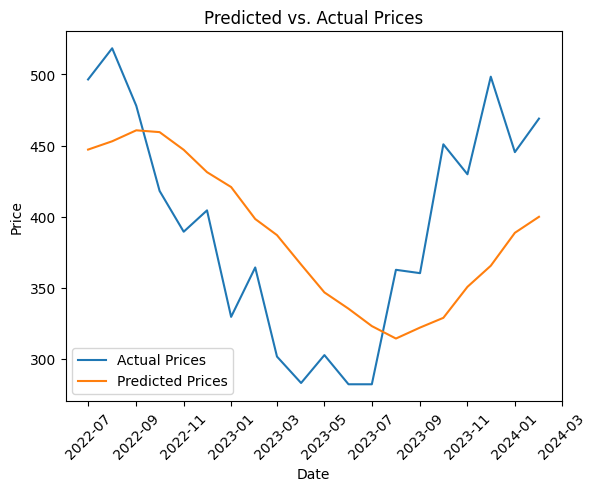

1/1 [==============================] - 0s 42ms/step
Predicted price for the next day: 399.9334


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout



# Extract only the 'Price' column
data = df['Price'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Define the number of previous time steps to use for prediction
n_steps = 30  # You can adjust this value based on your dataset and requirements

# Prepare the data for the LSTM model
X, y = [], []
for i in range(len(data_normalized) - n_steps - 1):
    X.append(data_normalized[i:i+n_steps])
    y.append(data_normalized[i+n_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions
predicted_normalized = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_normalized)

# Convert back to original scale
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize predictions vs. actual values
plt.plot(df['Date'][split_index+n_steps+1:], y_test_orig, label='Actual Prices')
plt.plot(df['Date'][split_index+n_steps+1:], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted vs. Actual Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print the next day predicted value
next_day_pred_normalized = model.predict(X_test[-1:])
next_day_pred_price = scaler.inverse_transform(next_day_pred_normalized)
print("Predicted price for the next day:", next_day_pred_price[0][0])
